In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from analysis_functions import Analysis

In [18]:
nn_path = "../../results/neural_networks/all0_std001"
nn_bias_path = "../../results/neural_networks/test_with_bias"
classical_dqn_path = "../../results/neural_networks/classical_dqn_test"
best_nn_path = "../../results/neural_networks/NN_10_10_He"


nn = Analysis(nn_path)
nn_bias = Analysis(nn_bias_path)
classical_dqn = Analysis(classical_dqn_path)
best_nn = Analysis(best_nn_path)

In [20]:
best_nn_return = best_nn.get_rewards()

best_nn_average_return = np.mean(best_nn_return, axis=0)
best_nn_std_return = np.std(best_nn_return, axis=0)

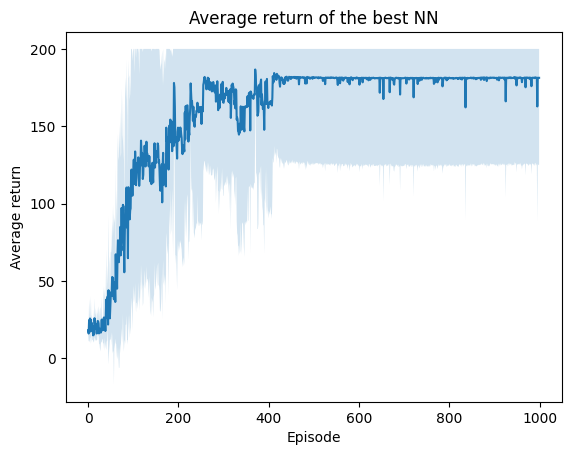

In [24]:
plt.plot(best_nn_average_return)
plt.fill_between(range(len(best_nn_average_return)), best_nn_average_return - best_nn_std_return, np.clip(best_nn_average_return + best_nn_std_return, a_min = None, a_max = 200), alpha=0.2)
plt.title("Average return of the best NN")
plt.xlabel("Episode")
plt.ylabel("Average return")
plt.show()
